# Battle of Neighbourhoods

###  Problem Statement

In order to get better life people ted to move to other city and want the same resources that they are habitual too.So we wil be finding the places that is similar to the places in delhi and offer same facilities.

###  Data 

Name of Neighbourhood of Delhi and Mumbai is taken from Wikipedia

Location of Neighbourhood is taken from OpenStreetMap Nominatim

Nearby Venues data is taken from Foursquare API

###  Import Libraries

In [7]:
import pandas as pd
import numpy as np 

import json
from pandas import json_normalize

import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import folium

from bs4 import BeautifulSoup
import geopy
import requests

from sklearn.cluster import KMeans

now we will get the data from wikipedia and do some of the web scrapping to get refined results

In [8]:
url_mumbai='https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai'
url_delhi='https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Delhi'

mumbai_neighbour takes the url and retreive all the neighbourhood from Mumbai by the method of web scraping

In [9]:
def mumbai_neighbor(url_mumbai):
    neighbor_mumbai=[]
    result=requests.get(url_mumbai).text
    soup=BeautifulSoup(result,'html.parser')
    for i in soup.find_all('h3'):
        x=i.find('a')
        try:
            neighbor_mumbai.append(x.next_element)
        except:
            pass
    return neighbor_mumbai

delhi_neighbour takes the url and retreive all the neighbourhood from Delhi by the method of web scraping

In [10]:
def delhi_neighbor(urld):
    neighbor_delhi=[]
    html_data_delhi=requests.get(url_delhi).text
    soup_delhi=BeautifulSoup(html_data_delhi,'html.parser')
    for i in soup_delhi.find_all('li'):
        try:
            x=i.a   
            if '<' in str(x.next_element):
                pass
            else:
                neighbor_delhi.append(x.next_element)
        except:
            neighbor_delhi.append(list(i.descendants)[0])
    return neighbor_delhi[:119]

In [11]:
delhi_neighbors=delhi_neighbor(url_delhi)

the function location finder will find the latitude and longitude of the neighbourhoods and returns the same

In [12]:
def location_finder(x,state):
    address='{}, {}'.format(x['Neighborhood'],state)
    geolocator=geopy.geocoders.Nominatim(user_agent='neighod')
    g=geolocator.geocode(address)
    try:
        x.loc['Latitude']=g.latitude
        x.loc['Longitude']=g.longitude
        x.loc['Importance']=g.raw['importance']
    except:
        x.loc['Latitude']=np.nan
        x.loc['Longitude']=np.nan
        x.loc['Importance']=np.nan


The function dataframe_creation will create the data frame and call function location finder and returns the dataframe

In [13]:
def dataframe_creation(data_list,state):
    columns=['Neighborhood','Latitude','Longitude','Importance']
    dataframe=pd.DataFrame(columns=columns)
    dataframe['Neighborhood']=data_list
    dataframe.apply(location_finder,axis=1,args=(state,))
    return dataframe

In [14]:
delhi_dataframe=dataframe_creation(delhi_neighbors,'Delhi')
delhi_dataframe

Neighborhood Latitude Longitude Importance
0      Adarsh Nagar  28.7166   77.1704   0.708428
1       Ashok Vihar  28.6995   77.1848      0.311
2         Begum Pur  28.7255   77.0584      0.585
3            Karala  28.7351   77.0325       0.47
4            Narela  28.8426   77.0918   0.500666
..              ...      ...       ...        ...
114  Rajouri Garden  28.6451   77.1239       0.56
115   Tihar Village  28.6346   77.1071   0.373151
116     Tilak Nagar  28.6365   77.0965   0.682128
117     Vikas Nagar   28.644   77.0545       0.56
118       Vikaspuri  28.6384   77.0708       0.52

[119 rows x 4 columns]

the data frame of delhi have 119 rows and 4 columns

ok..
now we continue the same step for mumbai data of neighbours

In [15]:
mumbai_neighbors=mumbai_neighbor(url_mumbai)

In [16]:
mumbai_dataframe=dataframe_creation(mumbai_neighbors,'Mumbai')

In [17]:
mumbai_dataframe

Neighborhood Latitude Longitude Importance
0          Andheri  19.1197   72.8464   0.580152
1   Mira-Bhayandar  19.2821   72.8741      0.311
2           Bandra   19.055   72.8402   0.559056
3         Borivali  19.2291   72.8574    0.58818
4          Dahisar  19.2495   72.8596   0.572959
5         Goregaon  19.1648     72.85   0.557785
6       Jogeshwari  19.1349   72.8488   0.498689
7             Juhu   19.107   72.8275   0.598549
8   Kandivali west  19.2084   72.8422      0.585
9   Kandivali east  19.2104   72.8641      0.585
10            Khar  19.0725   72.8337      0.495
11           Malad  19.1867   72.8486   0.546239
12       Santacruz  19.0928    72.857      0.111
13           Vasai  19.5553   72.9139       0.31
14           Virar   19.512   72.8477      0.201
15      Vile Parle  19.0999    72.844   0.646749
16         Bhandup  19.1439   72.9384   0.555162
17       Ghatkopar   19.086   72.9082   0.555961
18      Kanjurmarg  19.1297   72.9284   0.494532
19           Kurla  19.0653   72.8794   0.578339
20          Mulund  19.1723   72.9565   0.559806
21           Nahur  19.1577   72.9411      0.495
22           Powai  19.1187   72.9073   0.580508
23      Vidyavihar  19.0796   72.8975      0.221
24        Vikhroli  19.1115    72.928   0.554893
25         Chembur  19.0626   72.9011    0.54837
26         Govandi  19.0554   72.9151   0.466982
27        Mankhurd  19.0521   72.9339      0.495
28         Trombay   19.037   72.9464      0.345
29      Antop Hill  19.0208   72.8653       0.61
30         Byculla  18.9766   72.8328   0.555961
31          Colaba  18.9151    72.826      0.495
32           Dadar  19.0193   72.8429   0.577225
33            Fort  18.9333   72.8345      0.495
34         Girgaon  18.9543   72.8179      0.495
35       Kalbadevi  18.9493   72.8279   0.527152
36     Kamathipura  18.9653   72.8264   0.562955
37         Matunga  19.0274   72.8501   0.555961
38           Parel  19.0095   72.8377   0.515065
39          Tardeo  18.9723   72.8205      0.495

the mumbai dataframe have 39 rows and 4 columns

the function get_Credentials of to keep handing if someone wants to change the foursquare api credentials. 

it return all the required fields.

In [18]:
def get_credentials():
    Client_Id='30YJZ4SVOKWOSS5A3B5XVEDPGKRA0GLAUIU4GMKZ1K5KLS1C'
    Client_Secret='IE1AV21QGBW1AJMA4WUKPUVMIOPWIXPENYVKLTRYAC5VSZEM'
    Version='20200502'
    Limit=500
    Radius=50
    return [Client_Id,Client_Secret,Version,Limit,Radius]

the function get_Categories is used to get the categories of the nearby venues

In [19]:
def get_categories(row):
    try:
        cat=row['categories']
    except:
        cat=row['venue.categories']
        
    if len(cat)==0:
        return None
    else:
        return cat[0]['name']

Function get_places calls **FourSquare API** and retrieve the important and required information from the data

In [20]:
def get_places(dataframe):
    new_data=pd.DataFrame(columns=['Name','Categories','Latitude','Longitude'])
    for index,row in dataframe.iterrows():
        url_foursquare='https://api.foursquare.com/v2/venues/explore?&client_id={0[0]}&client_secret={0[1]}&v={0[2]}&ll={1},{2}&radius={0[4]}&limit={0[3]}'.format(get_credentials(),row['Latitude'],row['Longitude'])
        result=requests.get(url_foursquare).json()
        #print(result['response']['groups'],end='\n\n\n')
        try:
            data=json_normalize(result['response']['groups'][0]['items'])
            data['venue.categories']=data.apply(get_categories,axis=1)
            for name,categories,latitude,longitude in zip (data['venue.name'],data['venue.categories'],data['venue.location.lat'],data['venue.location.lng']):
                new_data=new_data.append({'Neighborhood':row['Neighborhood'],'Name': name,'Categories':categories,'Latitude':latitude,'Longitude':longitude},ignore_index=True)             
        except:
            pass
    return new_data

In [21]:
nearby_delhi=get_places(delhi_dataframe)

In [22]:
nearby_mumbai=get_places(mumbai_dataframe)


In [25]:
nearby_delhi.shape

(80, 5)

nearby_delhi data frame have 80 rows and 5 columns

In [26]:
nearby_mumbai.shape

(28, 5)

nearby_mumba data frame have 27 rows and 5 columns

###  Visulization


this section is to draw insights 

the function map_creater takes 3 parameters. A dataframe, state name, are necessarcy to be passed.

the function will create a map with the points marked as the neighbourhood .

In [28]:
def map_creater(dataframe,state,user_agent='map_default'):
    geolocator=geopy.geocoders.Nominatim(user_agent=user_agent)
    g=geolocator.geocode(state)
    map_created=folium.Map(location=[g.latitude,g.longitude],zoom_start=11)
    for index,row in dataframe.iterrows():
        if row.Latitude is not np.nan or row.Longitude is not np.nan:
            array=plt.cm.Blues(row['Importance'])
            label='{},{}'.format(row['Neighborhood'],state)
            color=colors.rgb2hex(array)
            label=folium.Popup(label,parse_html=False)
            folium.CircleMarker(location=[row['Latitude'],row['Longitude']],
                                radius=5,
                                weight=2,
                                color='black',
                                fill=True,
                                fill_color=color,
                                fill_opacity =0.8,
                                popup=label).add_to(map_created)
    return map_created

In [29]:
map_creater(delhi_dataframe,'Delhi')

In [30]:
map_creater(mumbai_dataframe,'Mumbai')

function bar_categories is used to create the bar chart on the basis of the categories and count

In [31]:
def bar_categories(dataframe,state):
    X=dataframe.groupby('Categories',as_index=False).count()
    plt.title('Venues Near '+state,fontdict={'family': 'serif','color':  'Red','size': 25})
    plot=plt.barh(X['Categories'],X['Name'])
    plt.xlabel('count',fontdict={'family': 'Verdana','color':  'green','size': 15})
    plt.ylabel('Categories',fontdict={'family': 'Verdana','color':  'green','size': 15})
    return plot 

<BarContainer object of 43 artists>

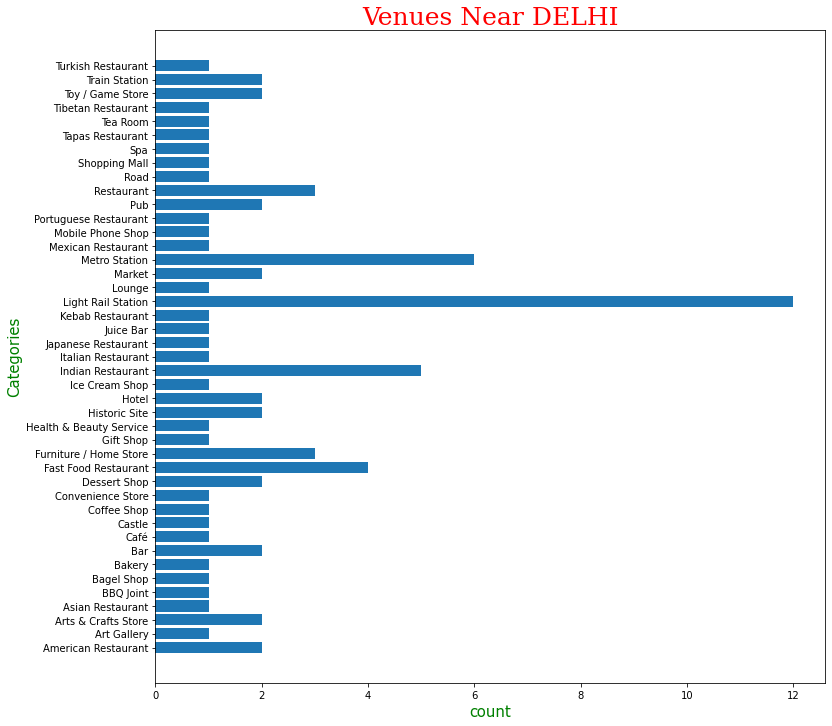

In [32]:
plt.figure(figsize=(12,12))
bar_categories(nearby_delhi,'DELHI')

<BarContainer object of 19 artists>

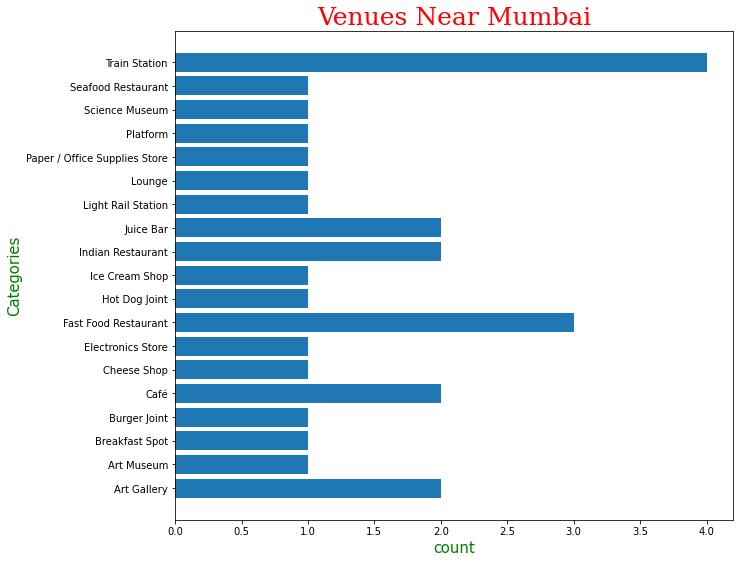

In [33]:
plt.figure(figsize=(10,9))
bar_categories(nearby_mumbai,'Mumbai')

###  Data Transformation

this section is used to transform the data in order to prepare it for training and prediction purpose

the function return top visited place in the neighbourhoods

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
delhi_venue_onehot=pd.get_dummies(nearby_delhi['Categories'],prefix='',prefix_sep='')
delhi_venue_onehot['Neighborhood']=nearby_delhi['Neighborhood']
fixed=[delhi_venue_onehot.columns[-1]]+list(delhi_venue_onehot.columns[:-1])
delhi_venue_onehot=delhi_venue_onehot[fixed]
delhi_grouped=delhi_venue_onehot.groupby('Neighborhood',as_index=False).mean()
num_top_venues = 1
columns = ['Neighborhood','Most Visited place']

delhi_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
delhi_neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    delhi_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)


delhi_neighborhoods_venues_sorted.head()

Neighborhood      Most Visited place
0   Adarsh Nagar      Light Rail Station
1       Badarpur           Train Station
2  Chandni Chowk           Historic Site
3     Chattarpur  Furniture / Home Store
4    Civil Lines      Italian Restaurant

In [37]:
mumbai_venue_onehot=pd.get_dummies(nearby_mumbai['Categories'],prefix='',prefix_sep='')
mumbai_venue_onehot['Neighborhood']=nearby_mumbai['Neighborhood']
fixed=[mumbai_venue_onehot.columns[-1]]+list(mumbai_venue_onehot.columns[:-1])
mumbai_venue_onehot=mumbai_venue_onehot[fixed]
mumbai_grouped=mumbai_venue_onehot.groupby('Neighborhood',as_index=False).mean()
num_top_venues = 1
columns = ['Neighborhood','Most Visited place']

mumbai_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
mumbai_neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    mumbai_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)


mumbai_neighborhoods_venues_sorted.head()

Neighborhood    Most Visited place
0      Andheri  Fast Food Restaurant
1       Bandra         Train Station
2      Byculla           Art Gallery
3       Colaba           Art Gallery
4        Dadar        Breakfast Spot

In [38]:
mumbai_needed_columns=list( set(delhi_grouped)-set(mumbai_grouped))
delhi_needed_columns= list(set(mumbai_grouped)-set(delhi_grouped))
mumbai_grouped[mumbai_needed_columns]=0.0
delhi_grouped[delhi_needed_columns]=0.0

###  Modelling

[24.926501271646334, 23.91752971808374, 20.9366142435886, 15.360045048826214, 13.458011695906437, 13.458011695906432, 11.449459449061248, 11.045468349235664, 10.059137130951537, 8.444708628295887]


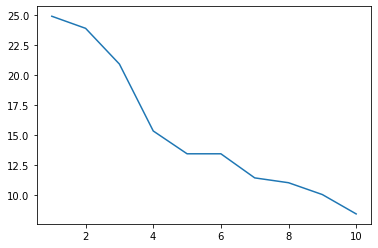

In [55]:
cost=[]
X=delhi_grouped.drop('Neighborhood',axis=1)
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=1)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)
print(cost)
plt.plot(list(range(1,11)),cost)

In [56]:
k_cluster=6
kmeans=KMeans(n_clusters=k_cluster,n_init=14,random_state=6)
kmeans.fit(X)

KMeans(n_clusters=6, n_init=14, random_state=6)

In [57]:
labels=kmeans.labels_
labels

array([1, 2, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 1, 3, 3, 5, 1, 3, 5, 3,
       4, 3, 3, 3, 1, 1, 3, 3, 2, 1, 1, 5, 4, 1, 1, 3])

In [58]:
delhi_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [60]:
delhi_merged=pd.merge(delhi_neighborhoods_venues_sorted,delhi_dataframe,left_on='Neighborhood',right_on='Neighborhood')
delhi_merged

Cluster Labels        Neighborhood       Most Visited place Latitude  \
0                1        Adarsh Nagar       Light Rail Station  28.7166   
1                2            Badarpur            Train Station  28.4932   
2                0       Chandni Chowk            Historic Site  28.6561   
3                3          Chattarpur   Furniture / Home Store  28.4971   
4                3         Civil Lines       Italian Restaurant  28.6769   
5                3     Connaught Place    Portuguese Restaurant  28.6314   
6                1         Dhaula Kuan       Light Rail Station  28.5919   
7                3      Dilshad Garden        Indian Restaurant  28.6758   
8                3     Dwarka Sub City         Toy / Game Store  28.5679   
9                3         Gole Market         Kebab Restaurant  28.6337   
10               3          Green Park      Japanese Restaurant   28.558   
11               3   Hauz Khas Village      American Restaurant  28.5539   
12               3          INA Colony        Indian Restaurant  28.5744   
13               5            Jangpura            Metro Station   28.583   
14               1         Jhandewalan       Light Rail Station  28.6443   
15               3      Jhilmil Colony                Juice Bar  28.6698   
16               3          Karol Bagh  Health & Beauty Service   28.653   
17               5         Kirti Nagar            Metro Station  28.6545   
18               1         Laxmi Nagar       Light Rail Station  28.6306   
19               3          Mahipalpur                    Hotel  28.5445   
20               5          Moti Nagar           Ice Cream Shop  28.6579   
21               3  New Friends Colony             Dessert Shop  28.5671   
22               4               Okhla      Arts & Crafts Store  28.5637   
23               3           Paharganj                    Hotel  28.6415   
24               3        Pandav Nagar        Mobile Phone Shop   28.618   
25               3          Pitam Pura        Indian Restaurant  28.7033   
26               1      Pragati Maidan       Light Rail Station  28.6235   
27               1         Preet Vihar       Light Rail Station  28.6414   
28               3     Rohini Sub City         Toy / Game Store  28.5679   
29               3        Sadar Bazaar     Fast Food Restaurant  28.6609   
30               2        Sarita Vihar            Train Station  28.5286   
31               1            Shahdara       Light Rail Station  28.6733   
32               1       Shastri Nagar       Light Rail Station  28.6701   
33               5        Shastri Park            Metro Station  28.6684   
34               4     South Extension      Arts & Crafts Store  28.5686   
35               1         Tilak Nagar       Light Rail Station  28.6365   
36               1          Tis Hazari       Light Rail Station  28.6672   
37               3         Tughlaqabad                   Castle  28.5112   

   Longitude Importance  
0    77.1704   0.708428  
1     77.303   0.559806  
2    77.2354      0.311  
3    77.1813      0.345  
4     77.225   0.672086  
5    77.2198   0.739507  
6    77.1617   0.649056  
7    77.3215   0.661947  
8    77.1594      0.211  
9    77.2056   0.614123  
10   77.2068   0.649557  
11   77.1947       0.61  
12   77.2102       0.51  
13   77.2393      0.221  
14   77.1999   0.589576  
15   77.3073      0.435  
16    77.189   0.722982  
17   77.1514   0.676913  
18   77.2776   0.651521  
19   77.1279      0.495  
20   77.1424    0.71305  
21   77.2698       0.66  
22   77.2891   0.533561  
23   77.2141      0.495  
24   77.2867      0.311  
25   77.1322   0.655499  
26   77.2425   0.659872  
27   77.2953   0.659235  
28   77.1594      0.211  
29   77.2277   0.560502  
30   77.2883   0.649806  
31    77.289   0.567286  
32   77.1819   0.655951  
33   77.2505   0.655951  
34   77.2206   0.650301  
35   77.0965   0.682128  
36   77.2166    0.67139  
37   77.2623      0.285

In [61]:
labels=kmeans.labels_
labels

array([1, 2, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 1, 3, 3, 5, 1, 3, 5, 3,
       4, 3, 3, 3, 1, 1, 3, 3, 2, 1, 1, 5, 4, 1, 1, 3])

### Results

below code will plot teh neighbourhood according to their cluster they belong to

In [62]:
address='{}'.format('Delhi')
geolocator=geopy.geocoders.Nominatim(user_agent='neighod')
g=geolocator.geocode(address)
lat=g.latitude
lng=g.longitude
map_delhi_cluster=folium.Map(location=[lat,lng])

array=plt.cm.rainbow(np.linspace(0,1,k_cluster))
color=[colors.rgb2hex(i) for i in array]
for i,data in delhi_merged.iterrows():
    
    folium.CircleMarker(location=[data['Latitude'],data['Longitude']],
                       radius=6,
                       fill=True,
                       fill_color=color[int(data['Cluster Labels']-1)],
                       fill_opacity=0.7,
                       color=color[int(data['Cluster Labels']-1)]).add_to(map_delhi_cluster)
map_delhi_cluster

In [63]:
delhi_merged[delhi_merged['Cluster Labels']==0]

Cluster Labels   Neighborhood Most Visited place Latitude Longitude  \
2               0  Chandni Chowk      Historic Site  28.6561   77.2354   

  Importance  
2      0.311

In [64]:
delhi_merged[delhi_merged['Cluster Labels']==1]

Cluster Labels    Neighborhood  Most Visited place Latitude Longitude  \
0                1    Adarsh Nagar  Light Rail Station  28.7166   77.1704   
6                1     Dhaula Kuan  Light Rail Station  28.5919   77.1617   
14               1     Jhandewalan  Light Rail Station  28.6443   77.1999   
18               1     Laxmi Nagar  Light Rail Station  28.6306   77.2776   
26               1  Pragati Maidan  Light Rail Station  28.6235   77.2425   
27               1     Preet Vihar  Light Rail Station  28.6414   77.2953   
31               1        Shahdara  Light Rail Station  28.6733    77.289   
32               1   Shastri Nagar  Light Rail Station  28.6701   77.1819   
35               1     Tilak Nagar  Light Rail Station  28.6365   77.0965   
36               1      Tis Hazari  Light Rail Station  28.6672   77.2166   

   Importance  
0    0.708428  
6    0.649056  
14   0.589576  
18   0.651521  
26   0.659872  
27   0.659235  
31   0.567286  
32   0.655951  
35   0.682128  
36    0.67139

In [65]:
delhi_merged[delhi_merged['Cluster Labels']==2]

Cluster Labels  Neighborhood Most Visited place Latitude Longitude  \
1                2      Badarpur      Train Station  28.4932    77.303   
30               2  Sarita Vihar      Train Station  28.5286   77.2883   

   Importance  
1    0.559806  
30   0.649806

In [66]:
delhi_merged[delhi_merged['Cluster Labels']==3]

Cluster Labels        Neighborhood       Most Visited place Latitude  \
3                3          Chattarpur   Furniture / Home Store  28.4971   
4                3         Civil Lines       Italian Restaurant  28.6769   
5                3     Connaught Place    Portuguese Restaurant  28.6314   
7                3      Dilshad Garden        Indian Restaurant  28.6758   
8                3     Dwarka Sub City         Toy / Game Store  28.5679   
9                3         Gole Market         Kebab Restaurant  28.6337   
10               3          Green Park      Japanese Restaurant   28.558   
11               3   Hauz Khas Village      American Restaurant  28.5539   
12               3          INA Colony        Indian Restaurant  28.5744   
15               3      Jhilmil Colony                Juice Bar  28.6698   
16               3          Karol Bagh  Health & Beauty Service   28.653   
19               3          Mahipalpur                    Hotel  28.5445   
21               3  New Friends Colony             Dessert Shop  28.5671   
23               3           Paharganj                    Hotel  28.6415   
24               3        Pandav Nagar        Mobile Phone Shop   28.618   
25               3          Pitam Pura        Indian Restaurant  28.7033   
28               3     Rohini Sub City         Toy / Game Store  28.5679   
29               3        Sadar Bazaar     Fast Food Restaurant  28.6609   
37               3         Tughlaqabad                   Castle  28.5112   

   Longitude Importance  
3    77.1813      0.345  
4     77.225   0.672086  
5    77.2198   0.739507  
7    77.3215   0.661947  
8    77.1594      0.211  
9    77.2056   0.614123  
10   77.2068   0.649557  
11   77.1947       0.61  
12   77.2102       0.51  
15   77.3073      0.435  
16    77.189   0.722982  
19   77.1279      0.495  
21   77.2698       0.66  
23   77.2141      0.495  
24   77.2867      0.311  
25   77.1322   0.655499  
28   77.1594      0.211  
29   77.2277   0.560502  
37   77.2623      0.285

In [67]:
delhi_merged[delhi_merged['Cluster Labels']==4]

Cluster Labels     Neighborhood   Most Visited place Latitude Longitude  \
22               4            Okhla  Arts & Crafts Store  28.5637   77.2891   
34               4  South Extension  Arts & Crafts Store  28.5686   77.2206   

   Importance  
22   0.533561  
34   0.650301

In [68]:
delhi_merged[delhi_merged['Cluster Labels']==5]

Cluster Labels  Neighborhood Most Visited place Latitude Longitude  \
13               5      Jangpura      Metro Station   28.583   77.2393   
17               5   Kirti Nagar      Metro Station  28.6545   77.1514   
20               5    Moti Nagar     Ice Cream Shop  28.6579   77.1424   
33               5  Shastri Park      Metro Station  28.6684   77.2505   

   Importance  
13      0.221  
17   0.676913  
20    0.71305  
33   0.655951

In [69]:
delhi_merged[delhi_merged['Cluster Labels']==-1]

Empty DataFrame
Columns: [Cluster Labels, Neighborhood, Most Visited place, Latitude, Longitude, Importance]
Index: []

###  Prediction

we used the data present to prediction that is mumbai data

In [70]:
x_predict=mumbai_grouped.drop('Neighborhood',axis=1)

In [71]:
yhat=kmeans.predict(x_predict)

In [72]:
mumbai_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', yhat)
mumbai_merged=pd.merge(mumbai_neighborhoods_venues_sorted,mumbai_dataframe,left_on='Neighborhood',right_on='Neighborhood')
mumbai_merged


Cluster Labels Neighborhood    Most Visited place Latitude Longitude  \
0                3      Andheri  Fast Food Restaurant  19.1197   72.8464   
1                3       Bandra         Train Station   19.055   72.8402   
2                3      Byculla           Art Gallery  18.9766   72.8328   
3                3       Colaba           Art Gallery  18.9151    72.826   
4                4        Dadar        Breakfast Spot  19.0193   72.8429   
5                3      Dahisar                  Café  19.2495   72.8596   
6                0         Fort    Seafood Restaurant  18.9333   72.8345   
7                3      Girgaon             Juice Bar  18.9543   72.8179   
8                3     Goregaon     Indian Restaurant  19.1648     72.85   
9                3      Govandi         Hot Dog Joint  19.0554   72.9151   
10               3         Khar            Art Museum  19.0725   72.8337   
11               3        Kurla              Platform  19.0653   72.8794   
12               3        Malad     Electronics Store  19.1867   72.8486   
13               3      Matunga         Train Station  19.0274   72.8501   
14               3       Mulund         Train Station  19.1723   72.9565   
15               3    Santacruz                Lounge  19.0928    72.857   
16               3   Vidyavihar         Train Station  19.0796   72.8975   
17               3     Vikhroli    Light Rail Station  19.1115    72.928   

   Importance  
0    0.580152  
1    0.559056  
2    0.555961  
3       0.495  
4    0.577225  
5    0.572959  
6       0.495  
7       0.495  
8    0.557785  
9    0.466982  
10      0.495  
11   0.578339  
12   0.546239  
13   0.555961  
14   0.559806  
15      0.111  
16      0.221  
17   0.554893

In [73]:
address='{}'.format('Mumbai')
geolocator=geopy.geocoders.Nominatim(user_agent='neighod')
g=geolocator.geocode(address)
lat=g.latitude
lng=g.longitude
map_mumbai_cluster=folium.Map(location=[lat,lng],zoom_start=11)

array=plt.cm.rainbow(np.linspace(0,1,k_cluster))
color=[colors.rgb2hex(i) for i in array]
for i,data in mumbai_merged.iterrows():
    
    folium.CircleMarker(location=[data['Latitude'],data['Longitude']],
                       radius=6,
                       fill=True,
                       fill_color=color[int(data['Cluster Labels']-1)],
                       fill_opacity=0.7,
                       color=color[int(data['Cluster Labels']-1)]).add_to(map_mumbai_cluster)
map_mumbai_cluster

In [74]:
mumbai_merged[mumbai_merged['Cluster Labels']==0]

Cluster Labels Neighborhood  Most Visited place Latitude Longitude  \
6               0         Fort  Seafood Restaurant  18.9333   72.8345   

  Importance  
6      0.495

In [75]:
mumbai_merged[mumbai_merged['Cluster Labels']==1]

Empty DataFrame
Columns: [Cluster Labels, Neighborhood, Most Visited place, Latitude, Longitude, Importance]
Index: []

In [76]:
mumbai_merged[mumbai_merged['Cluster Labels']==2]

Empty DataFrame
Columns: [Cluster Labels, Neighborhood, Most Visited place, Latitude, Longitude, Importance]
Index: []

In [77]:

mumbai_merged[mumbai_merged['Cluster Labels']==3]

Cluster Labels Neighborhood    Most Visited place Latitude Longitude  \
0                3      Andheri  Fast Food Restaurant  19.1197   72.8464   
1                3       Bandra         Train Station   19.055   72.8402   
2                3      Byculla           Art Gallery  18.9766   72.8328   
3                3       Colaba           Art Gallery  18.9151    72.826   
5                3      Dahisar                  Café  19.2495   72.8596   
7                3      Girgaon             Juice Bar  18.9543   72.8179   
8                3     Goregaon     Indian Restaurant  19.1648     72.85   
9                3      Govandi         Hot Dog Joint  19.0554   72.9151   
10               3         Khar            Art Museum  19.0725   72.8337   
11               3        Kurla              Platform  19.0653   72.8794   
12               3        Malad     Electronics Store  19.1867   72.8486   
13               3      Matunga         Train Station  19.0274   72.8501   
14               3       Mulund         Train Station  19.1723   72.9565   
15               3    Santacruz                Lounge  19.0928    72.857   
16               3   Vidyavihar         Train Station  19.0796   72.8975   
17               3     Vikhroli    Light Rail Station  19.1115    72.928   

   Importance  
0    0.580152  
1    0.559056  
2    0.555961  
3       0.495  
5    0.572959  
7       0.495  
8    0.557785  
9    0.466982  
10      0.495  
11   0.578339  
12   0.546239  
13   0.555961  
14   0.559806  
15      0.111  
16      0.221  
17   0.554893

In [78]:
mumbai_merged[mumbai_merged['Cluster Labels']==4]

Cluster Labels Neighborhood Most Visited place Latitude Longitude  \
4               4        Dadar     Breakfast Spot  19.0193   72.8429   

  Importance  
4   0.577225

In [79]:
mumbai_merged[mumbai_merged['Cluster Labels']==5]

Empty DataFrame
Columns: [Cluster Labels, Neighborhood, Most Visited place, Latitude, Longitude, Importance]
Index: []

In [80]:
mumbai_merged[mumbai_merged['Cluster Labels']==-1]

Empty DataFrame
Columns: [Cluster Labels, Neighborhood, Most Visited place, Latitude, Longitude, Importance]
Index: []

###  Conclusion

While training and prediction it is observed that a cluster have multiple categories of venues in same cluster, it can be due to the technique we used while data cleaning. Performing Dimensional Reductionality may solve this issue
the results show that most of the place in mumbai resemble the cluster 3 of delhi places hence it is easy of find places in cluster 3 than another type of places